In [1]:
import neuralnet as nn
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
from typing import List, Any
np.random.seed(123)

In [ ]:
class Data(nn.DataSource2D):
    _train_in : List[Any]
    _train_out : List[Any]

    def __init__(self):
        super().__init__()
        train_in, _ = pickle.load(open('data/mnist_preprocessed.pickle', 'rb'))
        self._train_in = [np.reshape(x, (28,28,1)) for x in train_in]
        self._train_out = [np.reshape(x, (28,28,1)) for x in train_in]

    def size(self):
        return len(self._train_in)

    def sample(self, i : int):
        return (self._train_in[i], self._train_out[i])

class Model(nn.Conv2D):
    def __init__(self):
        super().__init__(1,3)
        self._layer2 = nn.MaxPool2D()
        self._layer3 = nn.Conv2D(3,3)
        self._layer4 = nn.MaxUnPool2D()
        self._layer5 = nn.Conv2D(3,1)
    
    def forward(self, input):
        return self._layer5.forward(
            self._layer4.forward(
                self._layer3.forward(
                    self._layer2.forward(
                        super().forward(input)
                    )
                )
            )
        )        
    
    def backward(self, error):
        return super().backward(
            self._layer2.backward(
                self._layer3.backward(
                    self._layer4.backward(
                        self._layer5.backward(error)
                    )
                )
            )
        )
    
    def update(self, rate):
        super().update(rate)
        self._layer2.update(rate)
        self._layer3.update(rate)
        self._layer4.update(rate)
        self._layer5.update(rate)

In [3]:
N = 2
a = 0.0001

In [4]:
model = Model()
data = Data()
trainer = nn.Trainer2D(model, data)

In [5]:
sample = data.sample(0)
sample[0].shape

(28, 28, 1)

In [6]:

out = model.forward(sample[0])
out.shape

(7, 7, 3)

In [7]:
sample[1].shape

(7, 7, 3)

Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagation setup
Backpropagating
Backpropagat

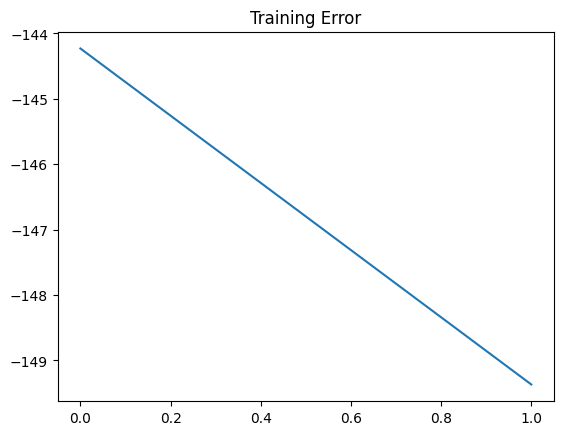

In [8]:
ts = time.time()
errors = trainer.train(N, a)
duration = time.time() - ts
print(f"Training of model complete in {duration / N} seconds per epoch.")

plt.title("Training Error")
plt.plot(range(len(errors)), errors)
plt.show()